In [48]:
import re
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ollama

MODEL = 'snowflake-arctic-embed:latest'

file_path = './simpsons_opt.txt'

def simpsons_chunks_opt(file_path):
    # Read the contents of the file
    with open(file_path, 'r') as file:
        content = file.read()
    
    chunks = content.split('\n')
    return chunks

chunks = simpsons_chunks_opt(file_path)
print(len(chunks))

# Regex pattern to extract the name
#pattern = re.compile(r'\d+\.\s(.*?):')
pattern = r'\d+\.?\s*([A-Z][a-z]+ [A-Z][a-z]+):'

simpsons_dict = {}

for chunk in chunks:
    #print(chunk)
    match = re.search(pattern, chunk)
    if match:
        name = match.group(1)
        #print(name)
    embedding = ollama.embeddings(model=MODEL, prompt=chunk)
    simpsons_dict[name] = embedding['embedding']

print(simpsons_dict['Jebediah Springfield'])

print(len(simpsons_dict))
print(simpsons_dict.keys())


70
[-0.7597954273223877, -2.0367486476898193, -0.2237004041671753, 0.19173789024353027, 0.06443244218826294, -0.36986538767814636, -0.34805625677108765, -0.28237301111221313, -0.36245331168174744, -0.7256240844726562, 0.41216155886650085, 0.05817551538348198, 0.09385235607624054, 1.212217092514038, -0.1926717311143875, 0.2018308937549591, 0.6082633137702942, 0.3229256570339203, -0.6886875033378601, 0.6076193451881409, 1.029685378074646, -0.16312336921691895, 0.584572970867157, 0.11149360239505768, 0.3339839577674866, 0.2115924060344696, -0.33263540267944336, 1.3374525308609009, 0.1340482383966446, 0.5859346389770508, 0.19137753546237946, -1.3008546829223633, -0.21052715182304382, -0.57725989818573, 0.36169731616973877, -0.18895402550697327, -0.3172837793827057, 0.23590998351573944, -0.22891391813755035, -0.06312504410743713, -0.46916261315345764, -0.006171688437461853, -0.12559469044208527, 0.04477789252996445, -0.26768648624420166, 1.3251457214355469, 0.23456725478172302, -1.322174906

In [52]:
import numpy as np

# Extract embeddings and names
names = list(simpsons_dict.keys())
embeddings = np.array(list(simpsons_dict.values()))

embeddings.shape
#embeddings[0]

# Perform PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

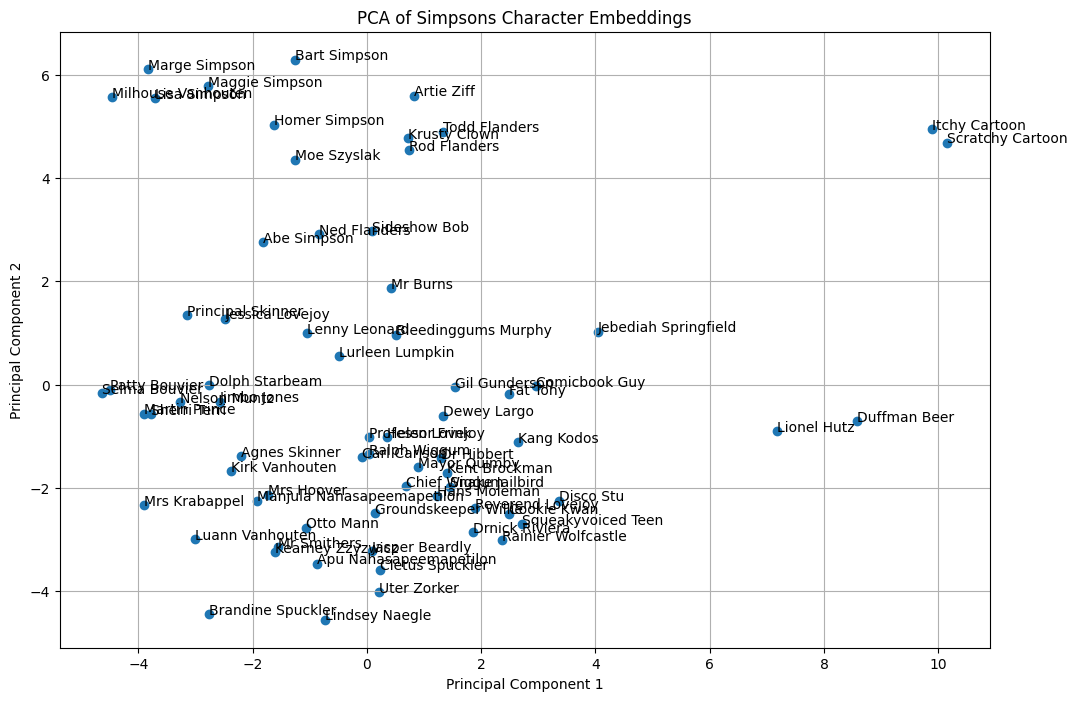

In [51]:
# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    plt.annotate(name, (embeddings_3d[i, 0], embeddings_3d[i, 1]))

plt.title('PCA of Simpsons Character Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [61]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Plot the 3D embeddings
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], name, fontsize=5)

plt.title('PCA of Simpsons Character Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

<IPython.core.display.Javascript object>

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have your embeddings and names ready

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], marker='o')

# Annotate each point with the character name
for i, name in enumerate(names):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], name, fontsize=5)

# Set labels and title
plt.title('PCA of Simpsons Character Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Enable interactive mode
plt.ion()

# Show the plot
plt.show()

# Keep the plot open
plt.ioff()
plt.show()

<IPython.core.display.Javascript object>

In [67]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have your embeddings and names ready

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=embeddings_3d[:, 0],
    y=embeddings_3d[:, 1],
    z=embeddings_3d[:, 2],
    mode='markers+text',
    text=names,
    hoverinfo='text',
    marker=dict(
        size=5,
        color=embeddings_3d[:, 2],  # color by z-coordinate
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    title='PCA of Simpsons Character Embeddings',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    width=900,
    height=700,
)

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Create a grid
grid_size = (69,69)
#grid_size = int(np.sqrt(len(embeddings_3d)))  # Adjust this if needed
x = np.linspace(0, grid_size-1, grid_size)
y = np.linspace(0, grid_size-1, grid_size)
X, Y = np.meshgrid(x, y)

# Reshape the embeddings to fit the grid
Z = embeddings_3d[:, 2].reshape(grid_size, grid_size)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Add a color bar
fig.colorbar(surf)

# Set labels and title
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
ax.set_zlabel('Embedding Z Value')
plt.title('3D Surface Plot of Character Embeddings')

TypeError: unsupported operand type(s) for -: 'tuple' and 'int'